<a href="https://colab.research.google.com/github/Anvayt24/NVIDIA-stock-prediction/blob/main/nvidiastocks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
import datetime
from datetime import date, timedelta
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM , Dropout
import tensorflow as tf
from sklearn.metrics import mean_squared_error

In [ ]:
end_date = datetime.datetime.now().strftime("%Y-%m-%d")
nvidia_data = yf.download('NVDA', start="2019-01-01", end=end_date)
nvidia_data.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-01-02,3.26600,3.46200,3.25125,3.40550,3.378323,508752000
2019-01-03,3.34475,3.37900,3.19225,3.19975,3.174215,705552000
2019-01-04,3.27350,3.44325,3.24250,3.40475,3.377579,585620000
2019-01-07,3.46250,3.62225,3.41075,3.58500,3.556391,709160000
2019-01-08,3.66725,3.66950,3.42250,3.49575,3.467852,786016000


In [ ]:
data = nvidia_data[['Open', 'Close' , 'High', 'Low', 'Volume']].values
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(data)
training_size = int(len(scaled_data )*0.85)
train_data = scaled_data[: training_size]
test_data = scaled_data[training_size :]

In [ ]:
def create_dataset(data , time_step = 50):
  X , y = [],[]
  for i in range(time_step , len(data)):
    X.append(data[i - time_step : i ])
    y.append(data[i , 1])
  return np.array(X) , np.array(y)

In [ ]:
time_step = 50
X_train , y_train = create_dataset(train_data , time_step)
X_test , y_test = create_dataset(test_data , time_step)

In [ ]:
X_train = X_train.reshape(X_train.shape[0] , X_train.shape[1] , X_train.shape[2]) #(samples,time step , features)
X_test = X_test.reshape(X_test.shape[0] , X_test.shape[1] , X_test.shape[2])
X_test

array([[[0.33880204, 0.34822604, 0.33729556, 0.35452719, 0.09418166],
        [0.33724932, 0.35661853, 0.34334444, 0.35587364, 0.13102015],
        [0.3432112 , 0.35310592, 0.34311877, 0.35619092, 0.19384093],
        ...,
        [0.42455357, 0.44768951, 0.43026329, 0.44661268, 0.10392958],
        [0.43677033, 0.45002368, 0.43757144, 0.45708255, 0.12961771],
        [0.426077  , 0.44060386, 0.42866192, 0.44501086, 0.14745795]],

       [[0.33724932, 0.35661853, 0.34334444, 0.35587364, 0.13102015],
        [0.3432112 , 0.35310592, 0.34311877, 0.35619092, 0.19384093],
        [0.34120439, 0.3438296 , 0.341794  , 0.34433587, 0.33208543],
        ...,
        [0.43677033, 0.45002368, 0.43757144, 0.45708255, 0.12961771],
        [0.426077  , 0.44060386, 0.42866192, 0.44501086, 0.14745795],
        [0.43091096, 0.45193486, 0.43537319, 0.45236222, 0.11238691]],

       [[0.3432112 , 0.35310592, 0.34311877, 0.35619092, 0.19384093],
        [0.34120439, 0.3438296 , 0.341794  , 0.34433587, 0.3

In [ ]:
print(f"X_train shape: {X_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (1179, 50, 5)
y_train shape: (1179,)
X_test shape: (168, 50, 5)
y_test shape: (168,)


In [ ]:
model = Sequential()
model.add(LSTM(units = 100 , return_sequences = True , input_shape = (X_train.shape[1] , X_train.shape[2])))
model.add(Dropout(0.2))


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
model.add(LSTM(units = 100 , return_sequences = True))
model.add(Dropout(0.2))

In [ ]:
model.add(Dense(units= 50 , activation = 'relu'))
model.add(Dense(units=1))
model.compile(optimizer = 'adam' , loss = 'mean_squared_error')

In [ ]:
model.fit(X_train, y_train, epochs=50, batch_size=64)

Epoch 1/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 7s 13ms/step - loss: 0.0104
Epoch 2/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0085
Epoch 3/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0079
Epoch 4/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0075
Epoch 5/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0078
Epoch 6/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0077
Epoch 7/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0079
Epoch 8/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0076
Epoch 9/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0076
Epoch 10/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0080
Epoch 11/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0078
Epoch 12/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0074
Epoch 13/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0078
Epoch 14/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0076
Epoch 15/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0078
Epoch

In [ ]:

# Make predictions on the test set
predictions = model.predict(X_test)

# Reshape predictions to be 2D
predictions = predictions.reshape(predictions.shape[0], predictions.shape[1])

# Get the number of features used in the original data
num_features = X_train.shape[2]

# Create an empty array with the correct shape for inverse transformation
predictions_reshaped = np.zeros((predictions.shape[0], num_features))

# Put the predictions back into the reshaped array
predictions_reshaped[:, -1] = predictions[:, -1]

# Reverse the scaling to get actual prices
predictions = scaler.inverse_transform(predictions_reshaped)[:, -1]

# Repeat the process for y_test
y_test_reshaped = np.zeros((y_test.shape[0], num_features))
y_test_reshaped[:, -1] = y_test
y_test_scaled = scaler.inverse_transform(y_test_reshaped)[:, -1]


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


In [ ]:
# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test_scaled, predictions))
print(f'Root Mean Squared Error: {rmse}')


Root Mean Squared Error: 1567338248.3272624


In [ ]:
train = data[:]

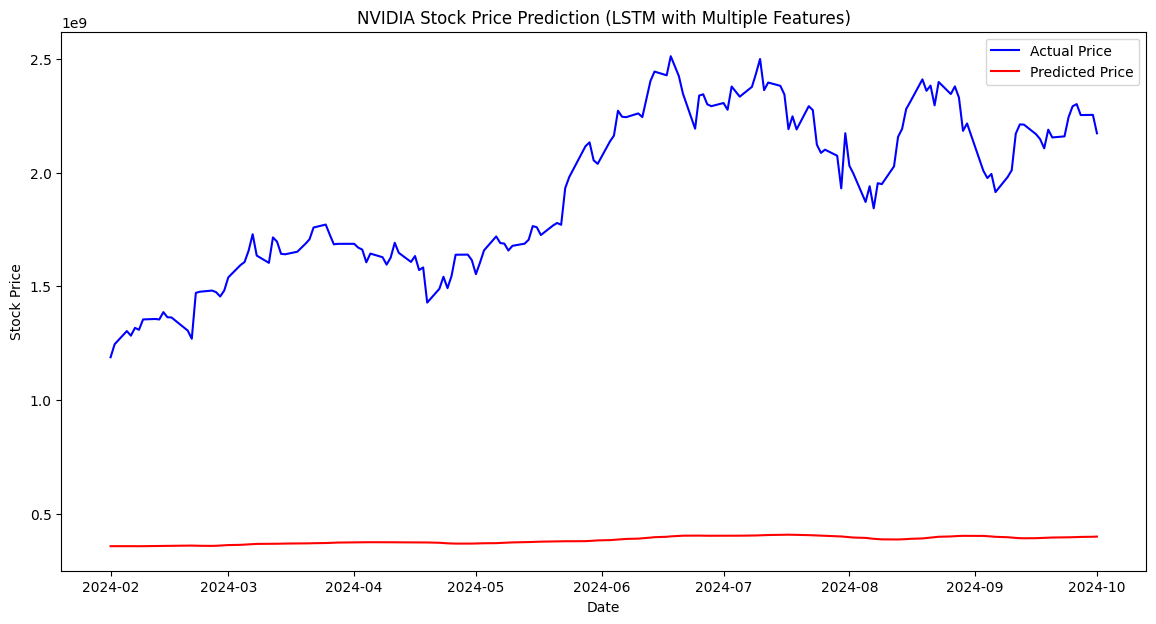

In [ ]:
# Plot the actual vs predicted prices
plt.figure(figsize=(14, 7))
plt.plot(nvidia_data.index[training_size + time_step:], y_test_scaled, label='Actual Price', color='blue')
plt.plot(nvidia_data.index[training_size + time_step:], predictions, label='Predicted Price', color='red')
plt.title('NVIDIA Stock Price Prediction (LSTM with Multiple Features)')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.show()
